# Main Code

2022-02-12 18:01:50.650467: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-02-12 18:01:50.650757: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


'NoneType' object is not subscriptable
0
'int' object has no attribute 'decode'
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
'NoneType' object is not subscriptable
0
Image Received
Image returned


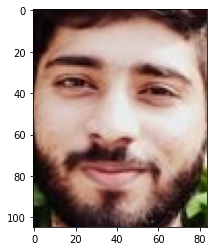

1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable
1
'NoneType' object is not subscriptable


In [ ]:
import os
import time
import numpy as np
import redis
from IPython.display import clear_output
from PIL import Image
from io import BytesIO
import base64
import json
import matplotlib.pyplot as plt
from face_detection import get_face
from utils import img_to_txt, decode_img, log_error


##########################
#
#   Global Variables
#
#
##########################

# Get Request 
server = os.environ['face_input_redis_server'] if 'os.environ' in os.environ and len(os.environ['redis_server']) > 1 else 'localhost'
# connect with redis server as Bob
r = redis.Redis(host=server, port=6379)
# Publish and suscribe redis
req_p = r.pubsub()
# subscribe to request Channel
req_p.subscribe('new_request')


# Forward Request
out_server = os.environ['face_ouput_redis_server'] if 'os.environ' in os.environ and len(os.environ['redis_server']) > 1 else 'localhost'
print(f"User Server {out_server}")
# connect with redis server as Bob
out_r = redis.Redis(host=out_server, port=6379)






def process_request(request ):
    '''
    Do you request processing here
    '''
    im =  decode_img(request['image'])
    face = get_face(im)
    plt.imshow(face)
    plt.show()
    return face


def forward_request(id_, face):
    global out_r
    with out_r.pipeline() as pipe:

        

        image= {
                'id'             : id_
                'request_time'   : str(datetime.today()),
                'image'          : img_to_txt("test_images/test.jpeg"),
                'status'         : 'pending'
                }

        # Publishing to the stream for testing
        pipe.publish('new_request', json.dumps(image))
        count+=1


        pipe.execute()
    print(f"Request Forward to  {ip}")

def listen_stream():
    '''
    Listening to the stream. 
    
    IF got any request from the stream then process it at the same time.
    '''
    count = 0
    requests =[]  
    while 1:

        try:
            try:
                # Listening To the stream
                request = str(req_p.get_message()['data'].decode())
                if request is not None :requests.append(request)
            except TypeError as e: log_error(e)
            
            # If got any request from stream then process the function
            if len(requests) > 0:
                req_id = requests.pop(0)
                process_request(json.loads(request) )
                
                count += 1
                
            print(count)

        except Exception as e: log_error(e)

    
listen_stream()       

In [1]:
from PIL import Image
import base64
import numpy as np
from io import BytesIO
image = np.asarray(Image.open("test_images/test.jpeg").convert("RGB"))
print(image.shape)


import base64
import numpy as np




(400, 400, 3)


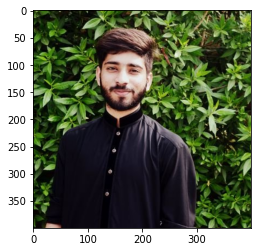

In [2]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()

In [9]:

import cv2
def npImage_to_txt(image):
    '''
    Convert numpy image to base64
    '''
    _, im_arr = cv2.imencode('.jpg', image)  # im_arr: image in Numpy one-dim array format.
    im_bytes = im_arr.tobytes()
    im_b64 = base64.b64encode(im_bytes)
    return im_b64.decode()
npImage_to_txt(image)

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCAGQAZADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD4w/Z5/bt/aP8AhH4Zk1vV/ENz4k8MD/iX2Vj4r2/O7/d/ep8+z7n9+vM7b9qv4qfGf4mXNv8AFbWbfezv9l06If6Pb/8ATuiV6D4w+J/7Nmm/Aia80Xx34f1prS+R30GG62XTpvT7iP8Ax7K+b/j58X9I1PVodc+HvgmXTrJ

In [3]:
im_bytes = base64.b64decode(im_b64)
im_arr = np.frombuffer(im_bytes, dtype=np.uint8)  # im_arr is one-dim Numpy array
img = cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR)

NameError: name 'im_b64' is not defined

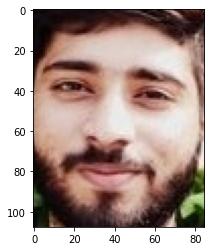

In [19]:
from utils import decode_img
image = "/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCABsAFUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD8MrWK3mhVkd1VfuB5Dgn6dOtWbFdcu5/stvAWLMAAqH+dZF1DcTXENrFIVyhZfr1r7d/Yg/4J36r8cPC1v4ruPEUlnLkEZi3KRjuMZHPvXHjMbDCR5paH0GV4Crj6rjHY+UbbwF4vumVV06VwGwQytgCnnwncW+oCzurF1kU4OOFNfopf/wDBJL9pfXboaT4F8faJDatJ81xcqwwPYd69E+DX/BBjxpo122teN/H8OtXwO6FlsCIAfoTk46dR0rz1m7s7anuvJKMJLmlZH5mW/wANfEem2Y1L+zZY0l4CSqWU9vw/AVveGvh74vGqwWmi6fd2N3LgxmFC45/iIIIx9f06V+2Pw2/4JC+A7GSK68bz/wBp3CgFvMgCBT2CgD5QBgdeetewaT/wT3+D/h6NJ7DwjbJKsZQyLCAcZ6cCud43FS1SOtYPLKS1kfhV4g+CXxfTRynxI8G2+u6Yg3Ot7pLxlx1ys8JWQY+uOOleb614T8JS2k1houvapaxxyBv7Du9P+1xbwOsLxBWVwOMOmf8AbPU/0aT/ALIPgZ9LaxbQYtjrtJfnjpjmvDPj9/wSa+EnxB0e6ufD2gQ2molCIpojjBx7joaI4/FRfvrQwlg8urfw5WZ+SvwI/bzv/BGiL8JviN4atfHnhK9g8jUfC/jWwNykYSRsNaO2J4pFB7O4VgcVwHxZ8S2fhPVZtc+B/iDUIPD1zO0thZ3urq91p4b70RyQzpnIweoxuyRmvX/2s/8AgnV+0d8EfE8uoXGjSXuleaga5tIdyrjpkFTjgAdD07dvPtJ/Y4+MfxHW01qC1e3jnV1ulWB5ktmHIb5OcbMErnOT26V2wnhqvvM5JRxVD3VqcJ4V8f8AxL8QT3eoaTqOrSXB8sXN1p0aP5igEIrMQ2Svz/ng5IzRX098WP2Mr/4FazH8PPhh4k0+6axTZrGpPcG3NzcFEcjy2OUC7yBnr170UP2Ld0QpY6x8ffsv/C/UPjJ8ZdG8JW1jJMs0oWUquQg75447c9K/dT9lD4a2PgDwVYeDdE0xHks4VRzGmFV+4JGN3XNfDf7FPgjSP2av2TdN+MVl4Bm13xV4xuvJ0u3s4AZGhfPRiPkXbGTk5+8K9T8S67/wVZ8WRpq/ww8MweH9MEIksdL0y3RpIxjpJI7nc+c5OAM9q8DHVYZjjmpStGJ9Hl2E+oZdeCvKR+mfw98MWkCie6nTeFGVCgD347YNen6Ra6MYkgaaIk/Nhmxz/n3r8OvEvxZ/4LU+Crdrubwt4qmA/wBddQR2z475GK7P9nD/AIKgft06B4lt9E+N3hrUhiVVlnvbXyyy/hkE4wOK76Tw1GN+ZM8ythMTinazR+11tZwuMxuhQfd2HirH9nwSn5gAOwzXivwW/aEn8deE7TWdQ0+aKaSINMWTAAIyOPpiuv8AEHxw8GeGdEl17WtYWCCOIMGYfePQr9a6YV6U48y2PJqYLEU6nJrc7kaRBcgxIFbHG3FaOn+ALi5jWCK1XbnOWWvjrxl/wWP/AGWfg9qkdr4z8ROv2i58qE2ymQjnG5sdAOn4V9KfA79vX9nz4r6VFqfhX4i6bcxTIPLZbgde6nPCn6kV0UvY1bXOfE0MXQV1e50viX9mTwR4ssLmy8V6dHPDPCUdCvQEHoeo69sV8p/Ej9hb4c/s6eCZrT4VeH7aFJLyaVfNBdg8isSSTznI7+tfemi+IPDfii187Q9VguhIpYlZRgD8M5/CvBf24re+0j4Sa3r1hII1s7Pzml8s8bSDgc8dP1Nc+Ow1GlDnRWWY7Fyq+yn+J+cnxFtfB954s/tbW2umN5p0Eu1oYmzId++Q/IDub5QeTwi9KK6Xwlonwy/aG0G28Wa1cz6dcwReSEdlKPFuYqRkjBzvyOeNtFZQtyI9x0rszf2c/hTe6J8CvBehlYYLbQfD1ukrSR8pmNWcficj6GvNvE3/AAUXlX4ot8FfhdHc3WrXFwtpYQ2trFaRPITgGa8uQYolz2CsSO46V9v/AAl8F6ZHoUenWmmRqixgbJPmwMcbuxOPYVwfj79k3w3aazca7c/D/T9XjuXLSW4tEG1ucHAABIPTIPavm4UPfdSSvc+hp4qnyexUrNaHwR8QP+CsnxC8EeI7v4ffFP4YazpN9BgNLpWv2V+77n8tD5Qt41kyedodSVwR1r0X4JftSaV8SPEl14J8Y6VFLqltJiOJrHyZQpwfngY5hbBBxkg/e3c17frX7Od1YMx8J/s7WeS+YxfmBYU7g4MZzg8jGPxrjdS/Y3v9S8ZwfETxH8OfDtv4jtn3Wt5okDwSHJyQxjZUceoZcE/nXTVo0K0LwTi0deDnPDwanNSTPrv9m+y0/wAS6Mtvps7MWwPvbuny4J9sY/Dv1roP2sPhVpEPw4Om3w2LLHvZUXrj+tdF+xb8I7vw/wCH1vNbKtcy7flxjHPPAxiu+/ax+HK6h4bhvra0e5jiUiSMPg/d6D19a7KWDqfUW29T5SvjorOoxT0ufjL+0P8Asd/sq6pfHWfH3iC8sZZnHkxi82hieu1QCzc5PC9c1sfsqfsG6T4E1Sfxz8DP2mdYttOuFK3Wk6zoFw+mtGy4+fcq7zjkHK4qt8bvgfqut/Gy51Xxd8WbzR7QTvHZaNHor2YJIIG+7Db3POcKy9h2rnfg9/wTj/bM8D+M7TxT8Kf22NZ0meO6VrSS1lvYJki67S4ZkkO3H3tykdR2rmwcJQj70z6rMY05RThC59yfCfwL+1p+zdaxeMvhP8Z7TXYoFLvpMpMttKg5KjD5TjtuJUY4NfW3w++LWn/tU/DHUdJ8U+EbjTri5svs2r6bOmVDyJt3oT95c4IPcEcdq+ZPgF4V/auvLW2tvjh4A06+kS4aO48V+ErlIfttuWO2S8tNiqs23GZYwm4jJBya+vfhz4Tk0PT4JQxIQlSWTazJkFQ2OuBjmuuFStKTi9YnyWOeEpuMlG07n5d/CHSPC3h2fxP8FvHNrbXNx4M8VXlrFLdo+4RyPvVRhhwFC8e/vRXTftOeGdQ8H/tZ/EQaNYpN/aOqw3k+5d3zvCORjGBgY7/doq4zmlY74RjViprqfVnwIngXw7aQSFpZXjUyyMOWbbnnPua9UTRtMucNcRqCyjKgcdK8U+Dut6Vb+FbbVILqQxJEjCQ9WG0Y/DFenWPi2zu4YzZ3RK4yWftU4OvTjGzOHGUZupzxL2q6Fo1tCSIR8o+6Op/OuOu9L0bUNXFlBFHtRh5oCFsseR8x9q0PF+r6lqMTrp8hzHESfc+lcpo37S3wK0fXbL4b6x4+0ew16aRPs2lXN/HHcXDFjuwrkHGemNx9q6ZSoznawUYVp02o3bPpD4P6ELR4QqKxWPnI7ZzXe+ItGs9f0xtNuYwQTuHHQ+vNeb+B/Gem6XOkk1xvXaCzxMpUZ529ev0/IdB6JaeM/DN22xdUj81hkQuGUqvr90g16tCdFUeRnymMp4p4j2kE9DxH4kfsfeA/iBBIupeHbS4jZyXjuIw4J9RuBIP0rlPC37BHhDw9cqdPgv7eIEny4tQk2r9AScV7H458bjw94pe2imZ4NiMCvTlRWn4b+IcGpFB5nyZIJbr1rjWHws6jTR6kcxzSOH0lo0N+GXwh8OeDLAWtpYs0RUA/aH3liONxz1/l7V0mo6fY2EJFvbJgqcj3q0dUs5IvME42AAgj0zzWJreoi583yZSqF9quDkHt/SuutToUqXunjxqYrEV7zPkv4g/Cjw749+PXjB7y/s4ZbVrLPnzohIeDfgZGSASfzoqD40/BLwr8U/jXr/iKHxKtjcwx2trdxSM0ZcpGSr5zhgQ2M+qkUV4MqzUrWPs6CpqjHXofL37E/wC1h4Z+J/wP0XUor8Syxabai8MLbx5m0R7M8YOV3cjoR9a+nNF8Ss1k2p30K20RcqS0g2sF4z+n61/Pr+xt+1Nq/wAJdc03T59ZlttLt7pJbpFkO13HTIz8xIxX6Z+Nf24/EniL9kDVfEXg/T31bWLmPEIhcJFYqwPzOfTYARjvXHWws8PiXd6Nno4evRx2FU4dtT7Yu/2i/hFoVjMb7xfpxMCFpGN2vXA4+mDX5Vftj/t7/BbTP2sojpngfSvEmkC6H9ptMo8yCVMbJI3z98DGCOgwK+b/AIcaD8Wfjjd3mo6r4wurDTzn7Zqd1dMsXzHP446D2FS2/wCwYdY19rqP4r6NKJZCys0xaYknqqtjP4GvWhHBygk5ak4ejmMfeoQvqffWi/8ABWcah8NLu+0L4lrZQ6eqwRz3DebcxoV4CxuTuYDjd7Zre/4JsQ61+2F+0+fFmiftKePdN0/SttxrAuL6RkvQRxGoZtiZ2nIC18I6r/wTV+JU+hx3Fl43t47drhWcHTpW34/2kPGcepr6h/YTl8RfsgQaoNFnifU9QnhEU2oTtHb24RGXJBwWzuLdfT0qIU8NTlfmZ2V6eZexcfZJX6n7W694S0iDThZz+ZLIYtsMk0u5yoPUt3P/AOqvKvEev3/w5vZFmc+RIcxzH7i+xrwbXf8AgpXd6R4BuR4rggv7ywEX2a6s72NmnIjUsEVWHHOPrgfxVrfs3/tUeEv2tvBN1qVrqKTx+cyS2jkebZ7SQyycnJPBVhgYI4p4isuW9NnzdDCV6Mn7ZH0N4P8AiVHqNt9tt7wSNJtRdsh2Yz2B967HVvGlhpFkZNQ1FIiqGVzxtAVdxz74IxXgmm30Pw50Ke41h0tYYAzIoYNtwxwPfPX8a+Yv+CjH7feleA/gxP4QsNXktNZ12wlaO5t5gDBCp5JP94hePY4xXNRxVSq+VhUwUJvngtD6r/4Jq6tb/H/R/iR8WviN4RW9F54+ns9IW/jYmK1to1jAHPRm3t/wKit//gmp8Wfh3b/sVeA9V1TxNpVjqer6ONR1SKC4RN0srMdxDEkEqBweeM9xRXZHH5ZFWlUin6ni1cWoVHFS0XmfyZeE0u7HX7XT41X7UswKJIOFYZ65OK++f2QPi5q1/wCB9U+GX2CPVob+NIWDOsKJgkNsBPz85B/SvlD9qj4X+Hfh74xHiHwhrwuIbyUmaEx7DEwwOP51g/DT4qa3oOqW7S6u8EKTqWkUgbRnsfet8RQ/tDCe0jpodHC2b0KMuWa3P3N+Bv7LnwU1P4UReHY/DGni2uoRHPbpDnY/OSTkjOaqat+yT4Y8FWsmgfEHwFY6/wCG3JWC4gsx5lsM8DcuGX8DXmv/AAT7/a28M+JfCkPhyK5kjRVwbmR9xll5IUAY/Ova/jp8QdZX4eXN1oGtXFhexIz27KD8zYJ28kg84r5aDqYeryuNz9HoYqq5c1OXus53TP2OP2TxbCTSp/EK6eAA2nWni25WIAnJyhbK85716t4O/Yw/Y3u9MFp4T+BFnqd4sOFuL29uLtQT3YySHcefw6dq/KvUf2+f2nrT4l3Xh/StQjvgZ/KMJs13Kf7x24z0r9Hv2DPjF8ffEPhuD/haF7BBE9sksTWsYjL57bec+nFey5qEE5x3FjcfXq037OWx0uqf8EpP2XPDdhqPiKXwdCurXdqwkmE0iQ24YE4jUEBeOO/r1wa+ef8Agl18KdL/AGZviP8AEbxTf6nJEhunsfs7SHyXiErOHUHOT5ZUEj0r7m+Mvj+Lwx8Ori/1ENEbiMx/KxYruGQxB+tflh8Xf2lfG3wt8d3+mtcwxpfTNKtyDsjIxgCRWJxk8DGPWudqU5+51PKw1VV6T9ueg/8ABQr/AIKW3llND8O/CWq3duGmWWC+t0AV4yWzDyT85GCCeOelfnv8T/jne/FTW7ZvF2u3N4lvbS20dnJJ5kjSykkKcYBwXwcY6VU/ah+MUPjG7mmj02IXc7KiqrrIUYYB5zgEY4OOBxz1r3D/AIJZf8E0dZ/ayluPif4u8QnRPD1obq2ivry3JVpyAUeFQCCQ2QWJwSD0rsrww+EwjqVXZtHyOb5msPTnTpvQ3rP44+PvAvhLStN+D2o3uvaWYisfnRSb7RVVAsTeWpHHzfgBRX318H/+CLH7Ovwy8KjSNR+NHjXX5ppDJLNaXyWEUbdwsaA5B45JOcZ4zgFfm86VGU29Hd318z8+eKcne5+C/iHxn4x+J0n27xhrk1480qgbolQBsqCflAzx9Kr+OfAHiH4X+K5/D2s2c6hJv3PmJsMowCCAc+tX9I060f4bDVzH+9DyD7xx94DPrnmvtv8Abo/Zw+Gc+i3OuyWt0bkadaTQOZwfIZ7VGbYSucFsnknrX6vUxKw2IVNLRn1OT5bHFUZ1E7OJ80/AD9pPxD8PWkkt9WmimSMx2oUBQinqMDHOc8179oX7afja/wDBS+GL7xLd3bAbYI7ibcsW5yzM3cnHTnjPevhLSLiVLR7hXO9W4Ofeu58P+IdW0rWIr21uTvEIIDcjpivReBoTfNY9LD5niaS5b7H0l8CY9L0/4t2fifVJ/Mjguo7l5iPNW4EjMQkgGDj6Yr9V/wBnX9q34b6N4W0mLXfDptVjLixFrCsixrtMh+bHQnceem5RnqR+Gfgjxx4j8K+KoL3R74o4XeQxJDY34BGenzH8hX0f4W+OHxJ0b4XG60nX2t5FsIAzIM79kkkfIJI+ZcBsYz7ZOeXE4SOh6WGzKdSEoy6n6B/tm/tw6LoPgvU9X1fUIEtoZbW2mSKcN5M8gdiHXghV2hsZywyAQa/Jr4q/tba146g1vSdVuUuJb/UW+y+TbpJGHU7VUMcs0Z2lhggg9T2rlPip8c/iV4gmuxrevG6h15rk6ja3CB43ZpThwDzuUqCpJODnqCRXMeDgfF3jm3utX2+bqt60c728SRiMMefLVQFU4wOnYd8kqhh6VOPM0clXGVak/Zw0O4+HP7Nviv4teFfFPxMtZWufD3h3QZdQ1u++y+Rg/aIbaKL5gRvklnVhg/dDd+R+mD/tvfstfsv/APBOnwTDpHiqNr3xH4LjEHhTS5Fku0umj2T/AC8iBVl3nccNnnnNemeLf2d/hZ8M/wDghP4rsvDOg4Gr+HLue+lmYF3ltxJJG+QBz5iBznjcTgAYA/Ca4vri7vlilb5JrUM6DpkgHp+PTpXl5hl9POEoVHaMWfO5zhVKSjfc++P2Zv8AgqT+0l8KfBUuk+D9YGtadcT77dPEdw8klqAWGxJCwLj1z0IOOMUV8XxeIdU8P6ba6ZpVx5UaRZJGSWJOeaK+frZBhlVaR81PLoqbXMf/2Q==",
image = decode_img(bytes(image[0], encoding="utf-8"))
plt.imshow(image)
plt.show()

b'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAIBAQEBAQIBAQECAgICAgQDAgICAgUEBAMEBgUGBgYFBgYGBwkIBgcJBwYGCAsICQoKCgoKBggLDAsKDAkKCgr/2wBDAQICAgICAgUDAwUKBwYHCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgr/wAARCABsAFUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD8MrWK3mhVkd1VfuB5Dgn6dOtWbFdcu5/stvAWLMAAqH+dZF1DcTXENrFIVyhZfr1r7d/Yg/4J36r8cPC1v4ruPEUlnLkEZi3KRjuMZHPvXHjMbDCR5paH0GV4Crj6rjHY+UbbwF4vumVV06VwGwQytgCnnwncW+oCzurF1k